### Import des librairies

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

### Données

<function matplotlib.pyplot.show(*args, **kw)>

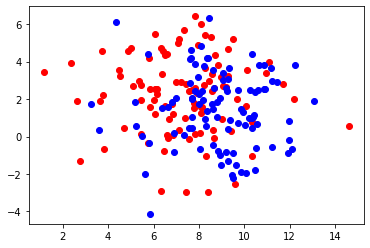

In [35]:
#X=np.array([[3,4],[3,3],[3.5,4],[3,1],[2,1],[2,3]])
#Y=np.array([1,1,1,-1,-1,-1])
# La fonction suivante génère 2 paquets de 100 données {(x1,x2)} et {y}
# avec y=0 ou y=1
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=2)
n=len(X)
d=len(X[1])
mask1=(Y==0)
mask0=(Y==1)
plt.scatter(X[mask1,0],X[mask1,1],c='r') #Y=1 en rouge
plt.scatter(X[mask0,0],X[mask0,1],c='b') #Y=0 en bleu
plt.show

## Fonctions objectif et gradient

On cherche $(b,w_1,w_2)$ tel que pour chacun des points $X_i=\begin{pmatrix}X_{i1}&X_{i2}\end{pmatrix}$ et leur valeur $Y_i\in\{-1,1\}$, 
$$\begin{array}{rl}
&b+w_1X_{i1}+w_2X_{i2}\simeq Y_i\\
\iff&b+\begin{pmatrix}X_{i1}&X_{i2}\end{pmatrix}\cdot \begin{pmatrix}w_1\\w_2\end{pmatrix}\simeq Y_i\\
\iff&b+X_i\cdot W-Y_i\simeq 0
\end{array}.$$
Pour ce faire, on minimise la forme quadratique :
$$\begin{array}{rl}
L(b,W)=&\frac{1}{2}\sum_{i}(b+X_i\cdot W-Y_i)^2\\
=&\frac{1}{2}(B+X\cdot W-Y)^2
\end{array}$$
où $B=\begin{pmatrix}b\\\vdots\\b\end{pmatrix}$.
On a $$\begin{array}{rl}
\frac{\partial L(b,W)}{\partial b}=&\sum_i (b+X_i\cdot W-Y_i)\times 1\\
=&\sum_i b+\sum_i (X\cdot W-Y)_i
\end{array}$$
et pour chaque $w_j$, $j\in\{1,2\}$, on a :
$$\frac{\partial L(b,W)}{\partial w_j}=\sum_i ((b+X_i\cdot W-Y_i)\times X_{ij})=(B+X\cdot W-Y)^\perp\cdot\begin{pmatrix}x_{1j}\\\vdots\\x_{nj}\end{pmatrix}$$

In [36]:
def f(b,W):
    B=[b for i in range(n)]
    return 0.5*np.dot(np.transpose(B+np.dot(X,W)-np.transpose(Y)),B+np.dot(X,W)-np.transpose(Y))  
def df(b,W):
    B=[b for i in range(n)]
    D=[np.sum(B+np.dot(X,W)-np.transpose(Y))]
    for j in range(d):
     D.append(np.dot(np.transpose(B+np.dot(X,W)-np.transpose(Y)),X[:,j]))
    return D

### Algorithme

In [37]:
def descente(gradf,b=0,W=[1,1],tau=0.0001,tolerance=1e-6,Nbiterations=1000):
    L=[]
    for i in range(Nbiterations):
        g = gradf(b,W)
        if g[0]**2+g[1]**2+g[2]**2< tolerance:
            return L        
        L.append([b,W])
        b=b-tau*g[0]
        W=[W[0]-tau*g[1],W[1]-tau*g[2]]
    print('L\'algorithme n\'a pas convergé')
    return L

### Calcul de la solution

In [ ]:
Xi=descente(df,0.5,[0,1],1e-4,1e-8,100000)
S=Xi[len(Xi)-1]
print('Solution : \n b=',S[0],'\n w=',S[1])

### Représentation graphique de l'algorithme et de la solution

<function matplotlib.pyplot.show(*args, **kw)>

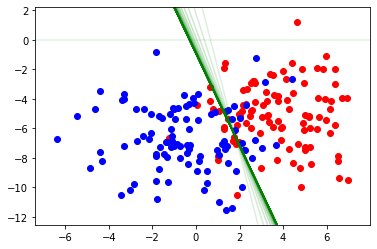

In [33]:
plt.scatter(X[mask1,0],X[mask1,1],c='r')
plt.scatter(X[mask0,0],X[mask0,1],c='b')
x1_values=np.linspace(np.min(X[:,0])-1,np.max(X[:,0])+1,20)
x2_values=np.linspace(np.min(X[:,1])-1,np.max(X[:,1])+1,20)
for i in np.linspace(0,len(Xi)-1,30):
    S=Xi[i.astype(int)]
    fct_values = np.array([[S[0]+S[1][0]*x1+S[1][1]*x2 for x1 in x1_values] for x2 in x2_values])
    plt.contour(x1_values,x2_values,fct_values,levels=[0.5],colors=['g'],alpha=0.1+0.899*i/(len(Xi)-1))
plt.show